#### We are going to create a SVM based Machine Learning model
#### that will be used to identify the anomalous data points inside our data
#### This is particularly useful to detect fraud , unknown behaviour partters inside our data

Steps:

1. Create a relevant dataset using some library or import a dataset from kaggle or huggingface
2. Preprocess the data like normalisation , standard scalar and visualise it
3. Create a basic SVM model 
4. Decorate the model with suitable C , gamma , sample_weight , class_weight etc.
5. Train the model on the data 
6. Test the model performance on unknown set of data


### **Import Libraries**

In [61]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split

### **Dataset Preparation**

In [40]:
X,Y = make_classification(n_samples=100000,n_classes=2,n_features=2,n_redundant=0,n_repeated=0,n_informative=2 
                          ,n_clusters_per_class=1,weights=[0.999,0.001],random_state=10)

In [41]:
scalar = StandardScaler()
X_norm = scalar.fit_transform(X)
print(f"mean = {X_norm.mean()} , standard deviation = {X_norm.std()}")

mean = 3.557953931476731e-15 , standard deviation = 1.0


In [42]:
print(f"Shape of X : {X_norm.shape} , shape of Y : {Y.shape}")

Shape of X : (100000, 2) , shape of Y : (100000,)


In [45]:
counter = Counter(Y) 
print(counter)

Counter({0: 99401, 1: 599})


#### Preparation of training and testing dataset

In [62]:
# df = pd.DataFrame(X)
# df['Y']=Y
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.2,random_state=10)

In [64]:
print(f"size of training data - X: {X_train.shape}, Y: {Y_train.shape}")
print(f"size of testing data - X: {X_test.shape}, Y: {Y_test.shape}")

size of training data - X: (80000, 2), Y: (80000,)
size of testing data - X: (20000, 2), Y: (20000,)


### **Visualise Dataset**

Text(0.5, 1.0, 'Distribution of data')

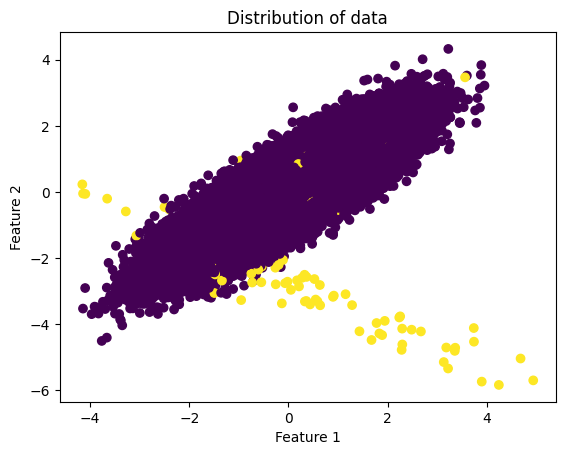

In [65]:
plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=Y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of data')

### **Create SVM model**

In [66]:
model = SVC(kernel='rbf',gamma='scale',C=0.5,class_weight={0:0.05,1:0.95})

### **Training**

In [67]:
model.fit(X_train,Y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,"{0: 0.05, 1: 0.95}"
,verbose,False


### **Evaluation**

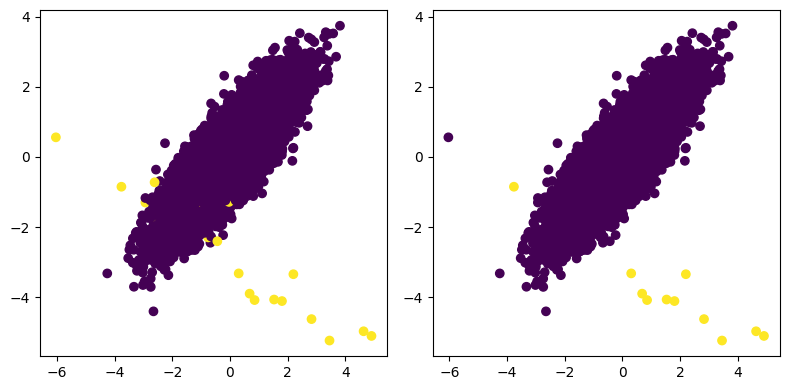

In [75]:
Y_pred = model.predict(X_test)
fig,axs= plt.subplots(1,2,figsize=(8,4))
axes=axs.flatten()
axes[0].scatter(X_test[:,0],X_test[:,1],marker='o',c=Y_test)
axes[1].scatter(X_test[:,0],X_test[:,1],marker='o',c=Y_pred)
plt.tight_layout()
plt.show()


In [73]:
acc = ((Y_pred==Y_test).sum()/len(Y_test))*100.0
print(f"Accuracy of the SVM model is: {acc:.3f} %")

Accuracy of the SVM model is: 99.540 %
